In [2]:
import os
import sys
lib_path = os.path.abspath(os.path.join(os.path.abspath(''), 'functions/'))
sys.path.append(lib_path)
# need to append our functions dir to the path! 

import SD_raster_loading
import SD_NC_loading
import netCDF4
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import dalecLoad
import spectralConv
import seaborn as sns
import scipy as sp
from datetime import timedelta

# Load SD data

- found that fit is a little better if I use the data from the slightly deeper part of the loch
- most points are approx the same, but some of the outliers work better!

In [3]:

#coord = [56.14693897799395, -3.923458784671348] # this is approx the location of the DALEC
coord = [56.146746528609306, -3.92285731543299] # this is perhaps a deeper part of the loch
sds_23 = SD_NC_loading.load_multiple_SDs('planetData/Airthrey-2023-Jul-Oct_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(3,3))

sds_22 = SD_NC_loading.load_multiple_SDs('planetData/Aithrey_2022_Apr-Sept_psscene_analytic_8b_udm2/acoliteOutput/',
                                      coord, skipSameDay=False, pixel_grid_shape=(3,3))

date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 file!!!
date skipping doesnae work if we only have 1 f

In [4]:
sds = pd.concat([sds_22.reset_index(), sds_23.reset_index()], axis=0)
sds

,Date,Wavelength,rho_s_62_93,rho_s_62_94,rho_s_62_95,rho_s_63_93,rho_s_63_94,rho_s_63_95,rho_s_64_93,rho_s_64_94,rho_s_64_95
0,2022-04-19 10:47:11+00:00,444.0,0.007358,0.006826,0.006773,0.008008,0.007902,0.007265,0.007557,0.007158,0.005748
1,2022-04-19 10:47:11+00:00,492.0,0.00399,0.004437,0.004531,0.00506,0.005177,0.004413,0.004378,0.005353,0.005459
2,2022-04-19 10:47:11+00:00,533.0,0.00477,0.005158,0.005365,0.005122,0.005025,0.004891,0.005753,0.005037,0.004247
3,2022-04-19 10:47:11+00:00,566.0,0.007731,0.007633,0.007645,0.00751,0.007645,0.007988,0.007829,0.007314,0.007314
4,2022-04-19 10:47:11+00:00,612.0,0.00698,0.007018,0.006929,0.007324,0.007006,0.00656,0.007794,0.007082,0.006573
...,...,...,...,...,...,...,...,...,...,...,...
219,2023-10-11 10:31:23+00:00,566.0,0.007163,0.006712,0.006994,0.007614,0.006055,0.005998,0.008027,0.006543,0.006938
220,2023-10-11 10:31:23+00:00,612.0,0.006832,0.006636,0.006479,0.007087,0.00695,0.006734,0.00742,0.006911,0.006165
221,2023-10-11 10:31:23+00:00,666.0,0.005871,0.006091,0.005831,0.005532,0.005232,0.004733,0.005392,0.004753,0.004554
222,2023-10-11 10:31:23+00:00,707.0,0.009012,0.007522,0.006947,0.008161,0.008629,0.008331,0.007969,0.007522,0.006904


In [5]:
sds['date'] = sds.Date.dt.date
sds.columns

Index(['Date', 'Wavelength', 'rho_s_62_93', 'rho_s_62_94', 'rho_s_62_95',
       'rho_s_63_93', 'rho_s_63_94', 'rho_s_63_95', 'rho_s_64_93',
       'rho_s_64_94', 'rho_s_64_95', 'date'],
      dtype='object')

In [6]:
sds_melt = pd.melt(sds, id_vars=['Date', 'date', 'Wavelength'], var_name='location', value_name='Rrs')

In [8]:
sds_melt['Rrs'] =  sds_melt.Rrs.astype(float)

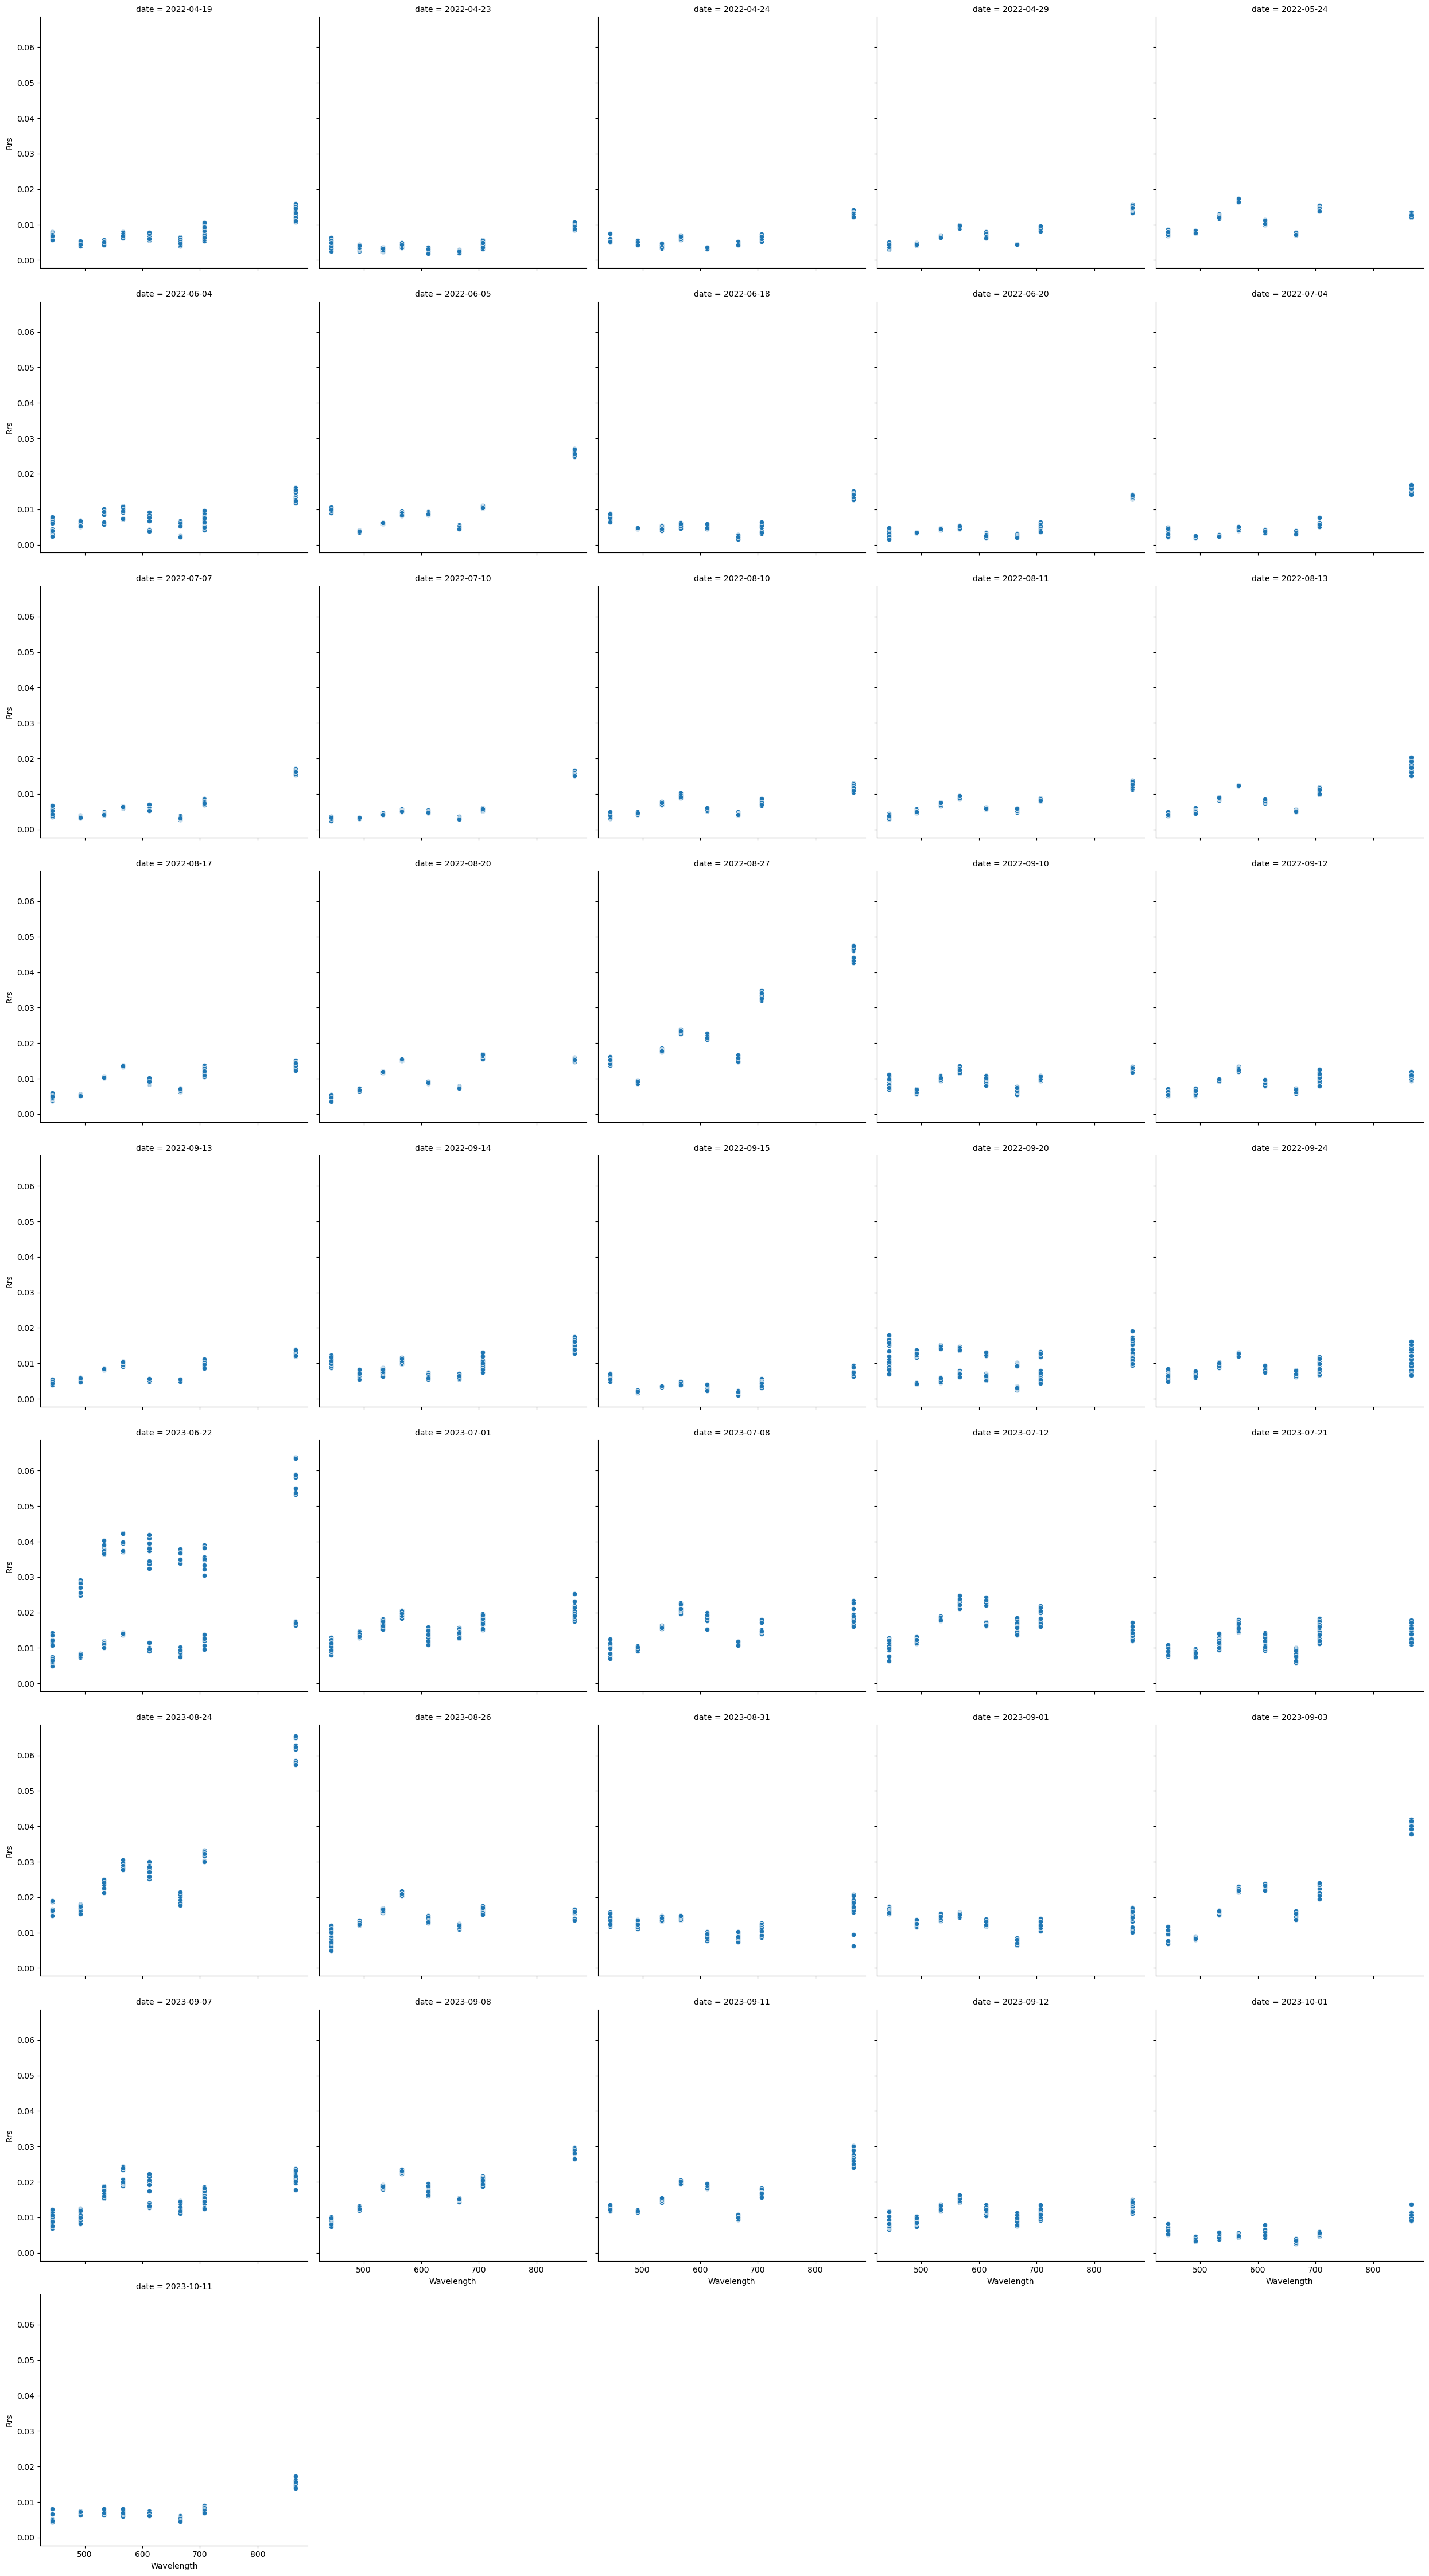

In [9]:
sns.relplot(data=sds_melt, x='Wavelength', y='Rrs', col='date', col_wrap=5, kind='scatter')

In [10]:
sds_med = sds_melt.drop(['location'], axis=1).groupby(['Date', 'date', 'Wavelength']).median()
sds_med.rename(columns={'Rrs':'Rrs_sd'}, inplace=True)
sds_med = sds_med.reset_index()
sds_med

,Date,date,Wavelength,Rrs_sd
0,2022-04-19 10:47:11+00:00,2022-04-19,444.0,0.007265
1,2022-04-19 10:47:11+00:00,2022-04-19,492.0,0.004531
2,2022-04-19 10:47:11+00:00,2022-04-19,533.0,0.005037
3,2022-04-19 10:47:11+00:00,2022-04-19,566.0,0.007645
4,2022-04-19 10:47:11+00:00,2022-04-19,612.0,0.007006
...,...,...,...,...
531,2023-10-11 10:31:23+00:00,2023-10-11,566.0,0.006938
532,2023-10-11 10:31:23+00:00,2023-10-11,612.0,0.006832
533,2023-10-11 10:31:23+00:00,2023-10-11,666.0,0.005392
534,2023-10-11 10:31:23+00:00,2023-10-11,707.0,0.007969


In [11]:
sds_simple = sds_melt.drop(['Date', 'location'], axis=1)
sds_simple.rename(columns={'Rrs':'Rrs_sd'}, inplace=True)
sds_simple

,date,Wavelength,Rrs_sd
0,2022-04-19,444.0,0.007358
1,2022-04-19,492.0,0.003990
2,2022-04-19,533.0,0.004770
3,2022-04-19,566.0,0.007731
4,2022-04-19,612.0,0.006980
...,...,...,...
4819,2023-10-11,566.0,0.006938
4820,2023-10-11,612.0,0.006165
4821,2023-10-11,666.0,0.004554
4822,2023-10-11,707.0,0.006904


# load DALEC data

In [12]:
dalec_df = pd.read_csv('DALEC_SD_bands_2022_23.csv')
dalec_df.drop(['Unnamed: 0', 'month', 'year', 'Date'], axis=1, inplace=True)
dalec_df.rename(columns={'Rrs':'Rrs_DALEC', 'wavelength':'Wavelength'}, inplace=True)
dalec_df

,Rrs_DALEC,Wavelength,date
0,0.003075,444.0,2022-07-28
1,0.004414,492.0,2022-07-28
2,0.006922,533.0,2022-07-28
3,0.008089,566.0,2022-07-28
4,0.006371,612.0,2022-07-28
...,...,...,...
37907,0.004569,566.0,2023-09-30
37908,0.004379,612.0,2023-09-30
37909,0.003612,666.0,2023-09-30
37910,0.003717,707.0,2023-09-30


In [13]:
dalec_med = dalec_df.groupby(['Wavelength', 'date']).median().reset_index()
dalec_med

,Wavelength,date,Rrs_DALEC
0,444.0,2022-07-28,0.003432
1,444.0,2022-07-31,0.003935
2,444.0,2022-08-01,0.003738
3,444.0,2022-08-02,0.003542
4,444.0,2022-08-03,0.002927
...,...,...,...
763,866.0,2023-09-26,0.003964
764,866.0,2023-09-27,0.003757
765,866.0,2023-09-28,0.002344
766,866.0,2023-09-29,0.001369


In [14]:
dalec_med['date'] = pd.to_datetime(dalec_med.date)
sds_med['date'] = pd.to_datetime(sds_med.date)

In [15]:
dalec_sd = dalec_med.merge(sds_med, on=['date', 'Wavelength'], how='left').dropna()
dalec_sd

,Wavelength,date,Rrs_DALEC,Date,Rrs_sd
10,444.0,2022-08-10,0.004061,2022-08-10 10:27:06+00:00,0.003470
11,444.0,2022-08-11,0.003798,2022-08-11 10:28:21+00:00,0.003213
12,444.0,2022-08-11,0.003798,2022-08-11 10:28:23+00:00,0.003689
14,444.0,2022-08-13,0.003795,2022-08-13 11:13:41+00:00,0.004364
17,444.0,2023-07-08,0.001222,2023-07-08 10:29:51+00:00,0.009997
...,...,...,...,...,...
831,866.0,2023-09-08,0.002888,2023-09-08 11:10:06+00:00,0.028635
832,866.0,2023-09-08,0.002888,2023-09-08 11:10:08+00:00,0.028539
835,866.0,2023-09-11,0.001588,2023-09-11 10:30:46+00:00,0.026761
836,866.0,2023-09-12,0.000951,2023-09-12 10:32:01+00:00,0.014329


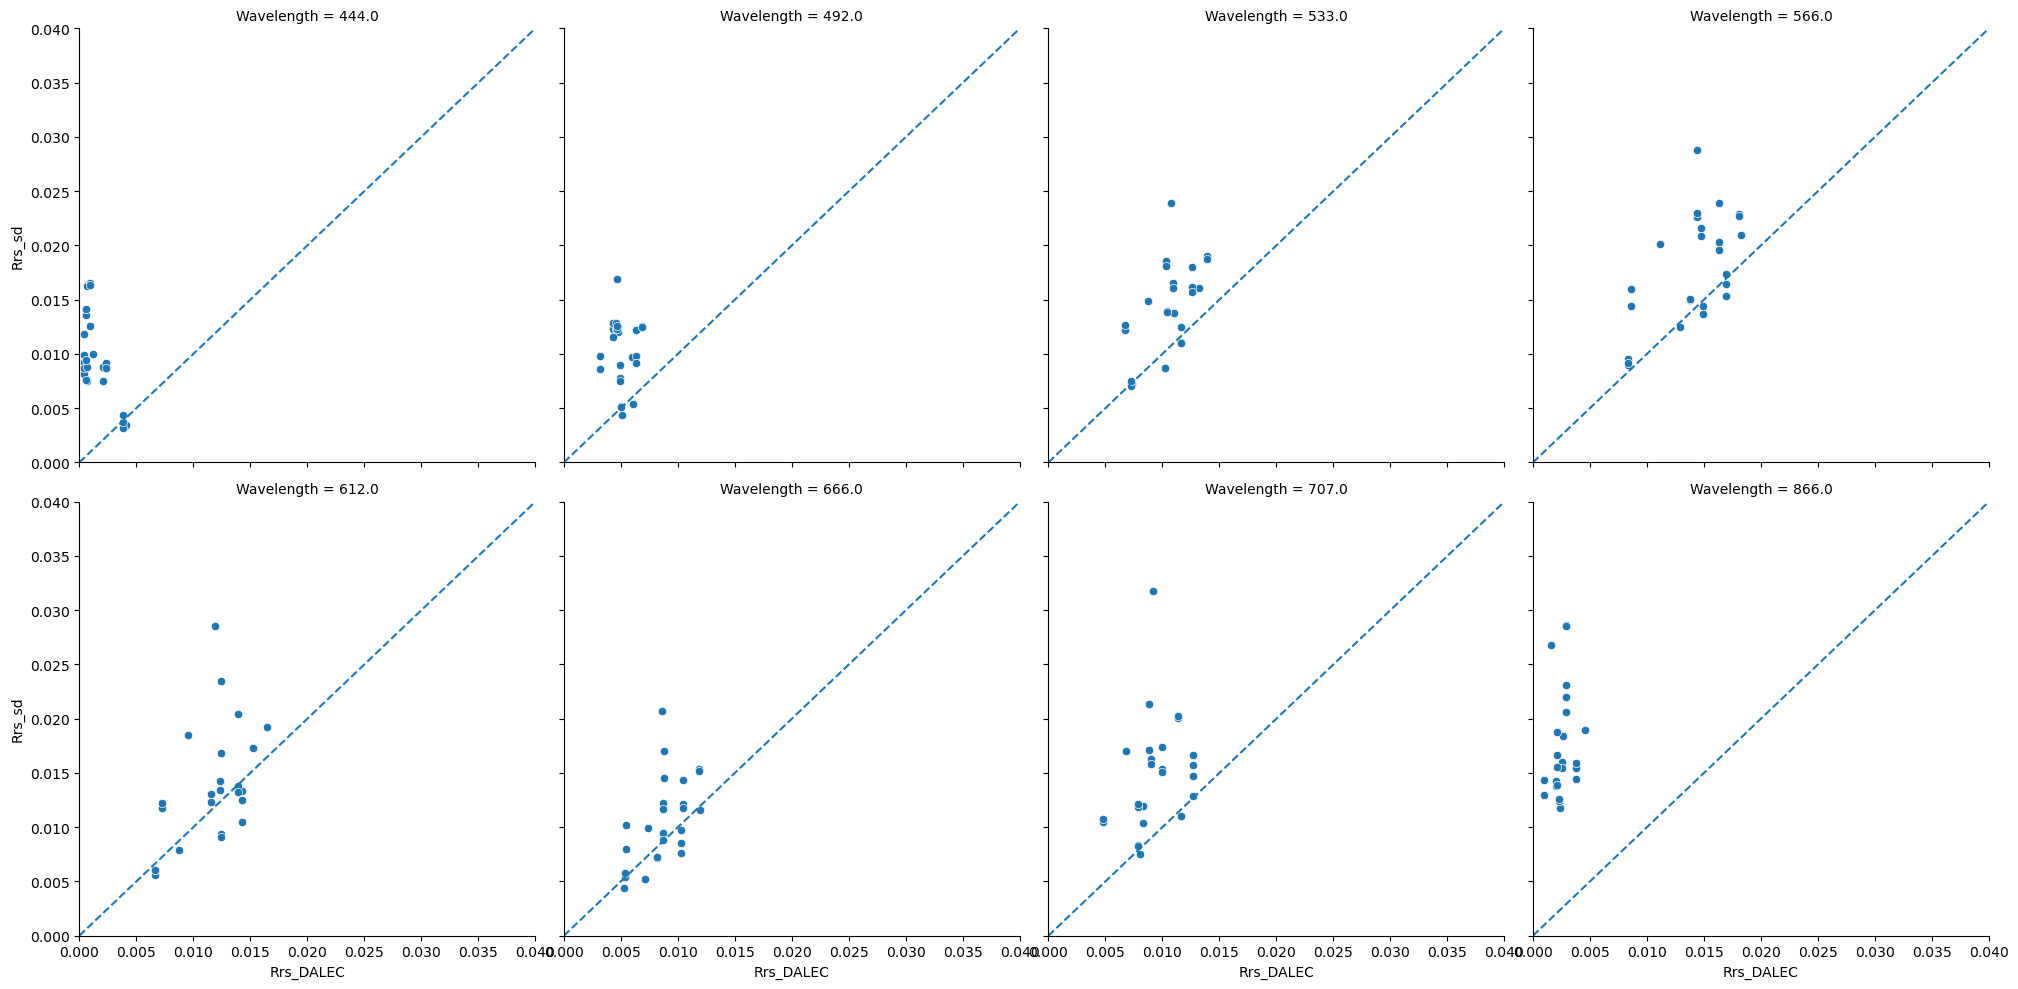

In [16]:
g = sns.relplot(data=dalec_sd, x='Rrs_DALEC', y='Rrs_sd', col='Wavelength', col_wrap=4)
g.set(ylim=(0, 0.04), xlim=(0, 0.04))

for ax in g.axes.flat:
    ax.plot([0, 0.04], [0, 0.04], '--')

In [17]:
dalec_med.date.unique()

<DatetimeArray>
['2022-07-28 00:00:00', '2022-07-31 00:00:00', '2022-08-01 00:00:00',
 '2022-08-02 00:00:00', '2022-08-03 00:00:00', '2022-08-05 00:00:00',
 '2022-08-06 00:00:00', '2022-08-07 00:00:00', '2022-08-08 00:00:00',
 '2022-08-09 00:00:00', '2022-08-10 00:00:00', '2022-08-11 00:00:00',
 '2022-08-12 00:00:00', '2022-08-13 00:00:00', '2022-08-14 00:00:00',
 '2022-08-15 00:00:00', '2023-07-08 00:00:00', '2023-07-09 00:00:00',
 '2023-07-10 00:00:00', '2023-07-11 00:00:00', '2023-07-12 00:00:00',
 '2023-07-13 00:00:00', '2023-07-14 00:00:00', '2023-07-15 00:00:00',
 '2023-07-16 00:00:00', '2023-07-17 00:00:00', '2023-07-18 00:00:00',
 '2023-07-19 00:00:00', '2023-07-20 00:00:00', '2023-07-21 00:00:00',
 '2023-07-22 00:00:00', '2023-07-23 00:00:00', '2023-07-24 00:00:00',
 '2023-07-25 00:00:00', '2023-07-26 00:00:00', '2023-07-27 00:00:00',
 '2023-07-28 00:00:00', '2023-07-29 00:00:00', '2023-07-30 00:00:00',
 '2023-07-31 00:00:00', '2023-08-01 00:00:00', '2023-08-02 00:00:00',
 '20

In [18]:
sds_med.date.unique()

<DatetimeArray>
['2022-04-19 00:00:00', '2022-04-23 00:00:00', '2022-04-24 00:00:00',
 '2022-04-29 00:00:00', '2022-05-24 00:00:00', '2022-06-04 00:00:00',
 '2022-06-05 00:00:00', '2022-06-18 00:00:00', '2022-06-20 00:00:00',
 '2022-07-04 00:00:00', '2022-07-07 00:00:00', '2022-07-10 00:00:00',
 '2022-08-10 00:00:00', '2022-08-11 00:00:00', '2022-08-13 00:00:00',
 '2022-08-17 00:00:00', '2022-08-20 00:00:00', '2022-08-27 00:00:00',
 '2022-09-10 00:00:00', '2022-09-12 00:00:00', '2022-09-13 00:00:00',
 '2022-09-14 00:00:00', '2022-09-15 00:00:00', '2022-09-20 00:00:00',
 '2022-09-24 00:00:00', '2023-06-22 00:00:00', '2023-07-01 00:00:00',
 '2023-07-08 00:00:00', '2023-07-12 00:00:00', '2023-07-21 00:00:00',
 '2023-08-24 00:00:00', '2023-08-26 00:00:00', '2023-08-31 00:00:00',
 '2023-09-01 00:00:00', '2023-09-03 00:00:00', '2023-09-07 00:00:00',
 '2023-09-08 00:00:00', '2023-09-11 00:00:00', '2023-09-12 00:00:00',
 '2023-10-01 00:00:00', '2023-10-11 00:00:00']
Length: 41, dtype: datetime

In [19]:
sds_med.date.unique()[sds_med.date.unique().isin(dalec_med.date.unique())]

<DatetimeArray>
['2022-08-10 00:00:00', '2022-08-11 00:00:00', '2022-08-13 00:00:00',
 '2023-07-08 00:00:00', '2023-07-12 00:00:00', '2023-07-21 00:00:00',
 '2023-08-24 00:00:00', '2023-08-26 00:00:00', '2023-08-31 00:00:00',
 '2023-09-01 00:00:00', '2023-09-07 00:00:00', '2023-09-08 00:00:00',
 '2023-09-11 00:00:00', '2023-09-12 00:00:00']
Length: 14, dtype: datetime64[ns]

In [20]:
# if I allow +- 2 days for match ups then I can match:

# sd: 2023-10-01 with dalec: 2023-09-30
# sd: 2022-08-17 with dalec: 2022-08-15
# sd: 2023-09-03 with dalec: 2023-09-01

# easiest way to do this is to manually change the date

In [21]:
sd_med_alt = sds_med.copy()

sd_med_alt['original_date'] = 'nan'
sd_med_alt['date_flag'] = 0

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'original_date'] = '2023-10-01'
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'original_date'] = '2023-08-17'
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'original_date'] = '2023-09-03'

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'date_flag'] = 1
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'date_flag'] = 1
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'date_flag'] = 1

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'date'] = pd.to_datetime('2023-09-30')
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'date'] = pd.to_datetime('2023-08-15')
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'date'] = pd.to_datetime('2023-09-01')


In [22]:
dalec_sd_alt = dalec_med.merge(sd_med_alt, on=['date', 'Wavelength'], how='left').dropna()
dalec_sd_alt.date.unique()

<DatetimeArray>
['2022-08-10 00:00:00', '2022-08-11 00:00:00', '2022-08-13 00:00:00',
 '2023-07-08 00:00:00', '2023-07-12 00:00:00', '2023-07-21 00:00:00',
 '2023-08-15 00:00:00', '2023-08-24 00:00:00', '2023-08-26 00:00:00',
 '2023-08-31 00:00:00', '2023-09-01 00:00:00', '2023-09-07 00:00:00',
 '2023-09-08 00:00:00', '2023-09-11 00:00:00', '2023-09-12 00:00:00',
 '2023-09-30 00:00:00']
Length: 16, dtype: datetime64[ns]

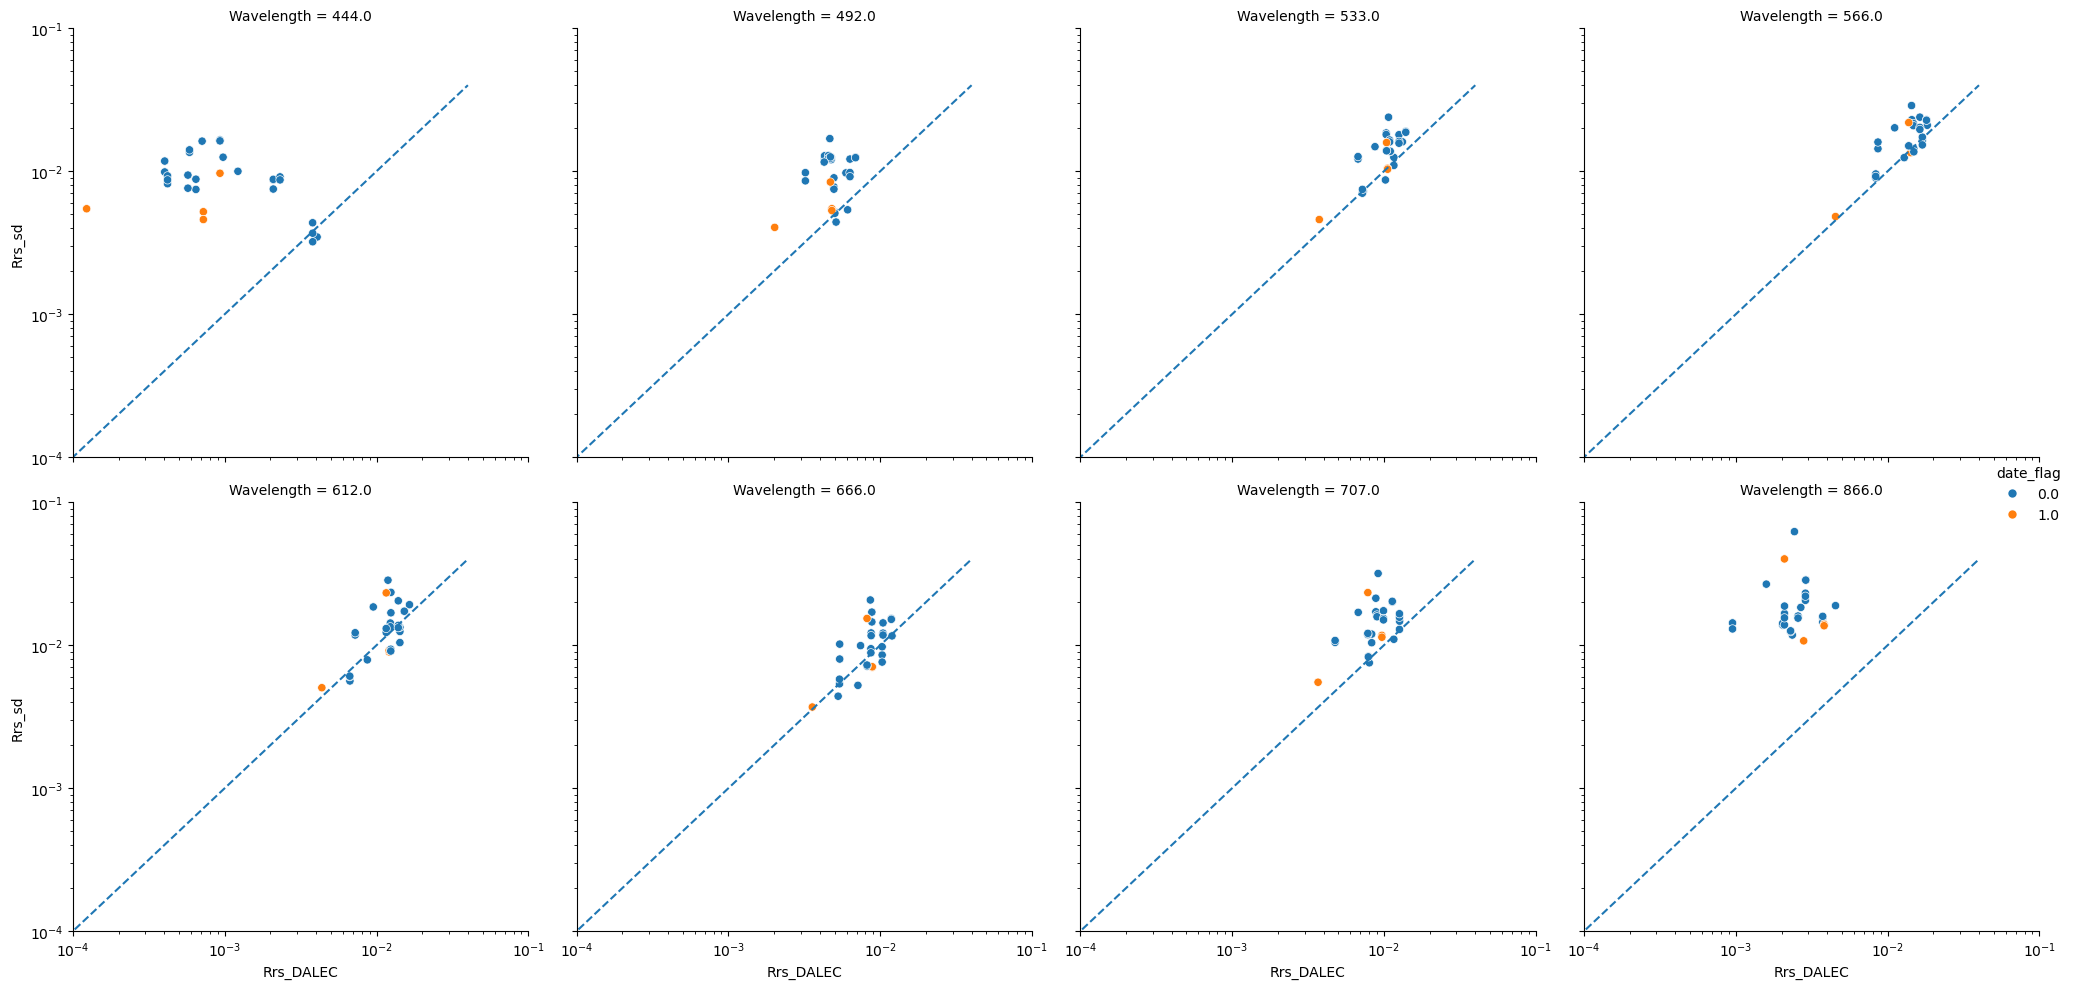

In [23]:
g = sns.relplot(data=dalec_sd_alt, x='Rrs_DALEC', y='Rrs_sd', col='Wavelength', col_wrap=4, hue='date_flag')
g.set(xscale="log")
g.set(yscale="log")
g.set(ylim=(0.0001, 0.1), xlim=(0.0001, 0.1))
#g.set(ylim=(0, 0.04), xlim=(0, 0.04))


for ax in g.axes.flat:
    ax.plot([0, 0.04], [0, 0.04], '--')

plt.tight_layout()

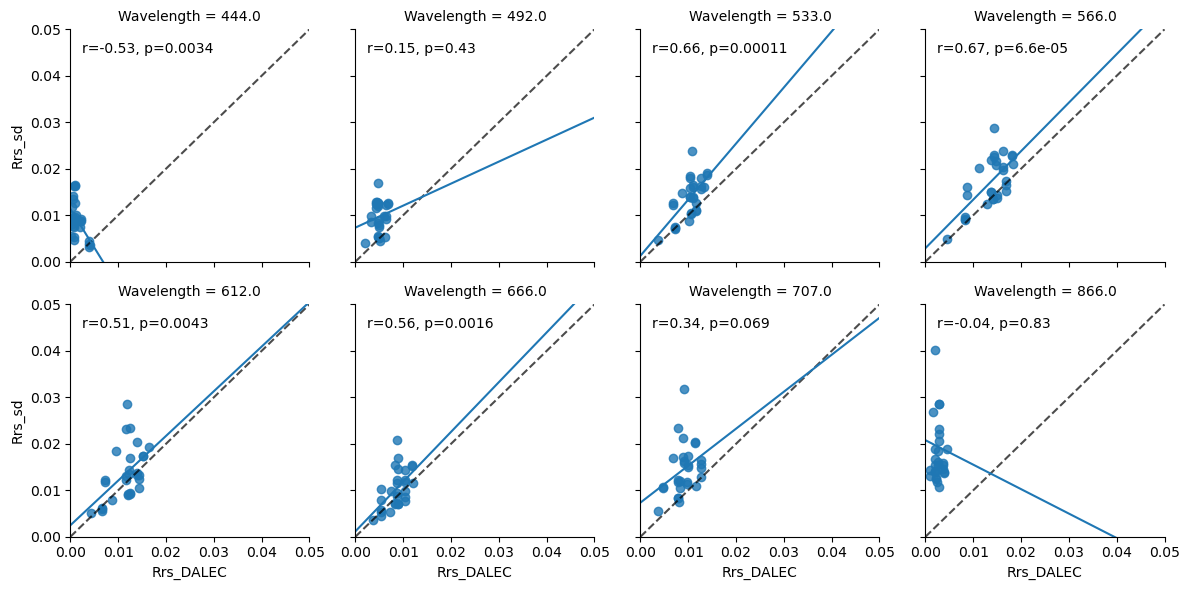

In [24]:
g = sns.lmplot(data=dalec_sd_alt, x='Rrs_DALEC', y='Rrs_sd', col='Wavelength',
               col_wrap=4, order=1, fit_reg=False, height=3)
#g.set(ylim=(0.0001, 0.1), xlim=(0.0001, 0.1))

g.set(ylim=(0, 0.05), xlim=(0, 0.05))


for ax in g.axes.flat:
    ax.plot([0, 0.05], [0, 0.05], 'k--', alpha=0.7)
    
def annotate(data, **kws):
    res = sp.stats.linregress(data['Rrs_DALEC'], data['Rrs_sd'])
    ax = plt.gca()
    ax.text(0.05, 0.9, 'r={:.2f}, p={:.2g}'.format(res.rvalue, res.pvalue),
            transform=ax.transAxes)
    ax.plot([0.0001, 0.05],
            [res.intercept + res.slope*0.0001, res.intercept + res.slope*0.05])
    
#    y_fit = data['Rrs_DALEC']*res.slope + res.intercept
#     MAE = np.sum(np.abs(y_fit - data['Rrs_DALEC']))/len(data['Rrs_DALEC'])
#     ax.text(0.05, 0.8, 'MAE={:.2g}'.format(MAE),
#             transform=ax.transAxes)
    
g.map_dataframe(annotate)

# g.set(xscale="log")
# g.set(yscale="log")

#g.set(ylim=(0.0001, 0.1), xlim=(0.0001, 0.1))


plt.tight_layout()
plt.show()




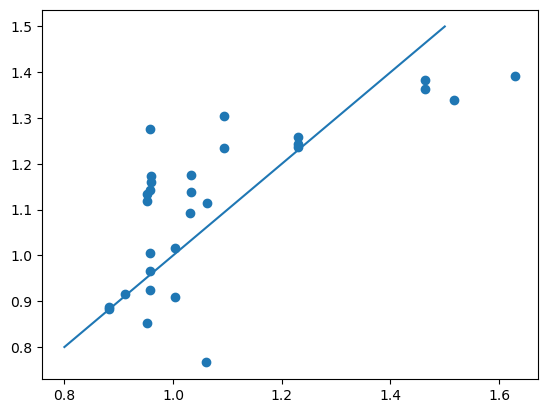

In [25]:

dalec_ratio = dalec_sd_alt[dalec_sd_alt.Wavelength==707.].Rrs_DALEC.values/dalec_sd_alt[dalec_sd_alt.Wavelength==666.].Rrs_DALEC.values
sd_ratio = dalec_sd_alt[dalec_sd_alt.Wavelength==707.].Rrs_sd.values/dalec_sd_alt[dalec_sd_alt.Wavelength==612.].Rrs_sd.values

plt.scatter(dalec_ratio, sd_ratio)
plt.plot([0.8, 1.5], [0.8, 1.5])

# sds_melt.Date.dt.hour.unique()

# only look at DALEC data from between 10-12 in the morning (ie. to match sd overpass time approx)

In [26]:
dalec_morn = pd.read_csv('DALEC_SD_bands_2022_23.csv')
dalec_morn.drop(['Unnamed: 0', 'month', 'year'], axis=1, inplace=True)
dalec_morn.rename(columns={'Rrs':'Rrs_DALEC', 'wavelength':'Wavelength'}, inplace=True)
dalec_morn['Date'] = pd.to_datetime(dalec_morn.Date)
dalec_morn = dalec_morn[dalec_morn.Date.dt.hour.isin([10, 11])]
dalec_morn.drop(['Date'], inplace=True, axis=1)
dalec_morn = dalec_morn.groupby(['Wavelength', 'date']).median().reset_index()
dalec_morn['date'] = pd.to_datetime(dalec_morn.date)
dalec_morn

,Wavelength,date,Rrs_DALEC
0,444.0,2022-07-28,0.003432
1,444.0,2022-07-31,0.003935
2,444.0,2022-08-01,0.003738
3,444.0,2022-08-02,0.003542
4,444.0,2022-08-03,0.002927
...,...,...,...
755,866.0,2023-09-25,0.001589
756,866.0,2023-09-26,0.004387
757,866.0,2023-09-27,0.002829
758,866.0,2023-09-28,0.002302


In [27]:
# NEED TO DO THIS AGAIN, because we lose one matching date

sd_med_alt = sds_med.copy()

sd_med_alt['original_date'] = 'nan'
sd_med_alt['date_flag'] = 0

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'original_date'] = '2023-10-01'
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'original_date'] = '2023-08-17'
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'original_date'] = '2023-09-03'

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'date_flag'] = 1
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'date_flag'] = 1
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'date_flag'] = 1

sd_med_alt.loc[sd_med_alt.date=='2023-10-01', 'date'] = pd.to_datetime('2023-09-29') # this is 29th not 30th now!
sd_med_alt.loc[sd_med_alt.date=='2022-08-17', 'date'] = pd.to_datetime('2023-08-15')
sd_med_alt.loc[sd_med_alt.date=='2023-09-03', 'date'] = pd.to_datetime('2023-09-01')

In [28]:
dalec_morn_sd_alt = dalec_morn.merge(sd_med_alt, on=['date', 'Wavelength'], how='left').dropna()
dalec_morn_sd_alt.date.unique()

<DatetimeArray>
['2022-08-10 00:00:00', '2022-08-11 00:00:00', '2022-08-13 00:00:00',
 '2023-07-08 00:00:00', '2023-07-12 00:00:00', '2023-07-21 00:00:00',
 '2023-08-15 00:00:00', '2023-08-24 00:00:00', '2023-08-26 00:00:00',
 '2023-08-31 00:00:00', '2023-09-01 00:00:00', '2023-09-07 00:00:00',
 '2023-09-08 00:00:00', '2023-09-11 00:00:00', '2023-09-12 00:00:00',
 '2023-09-29 00:00:00']
Length: 16, dtype: datetime64[ns]

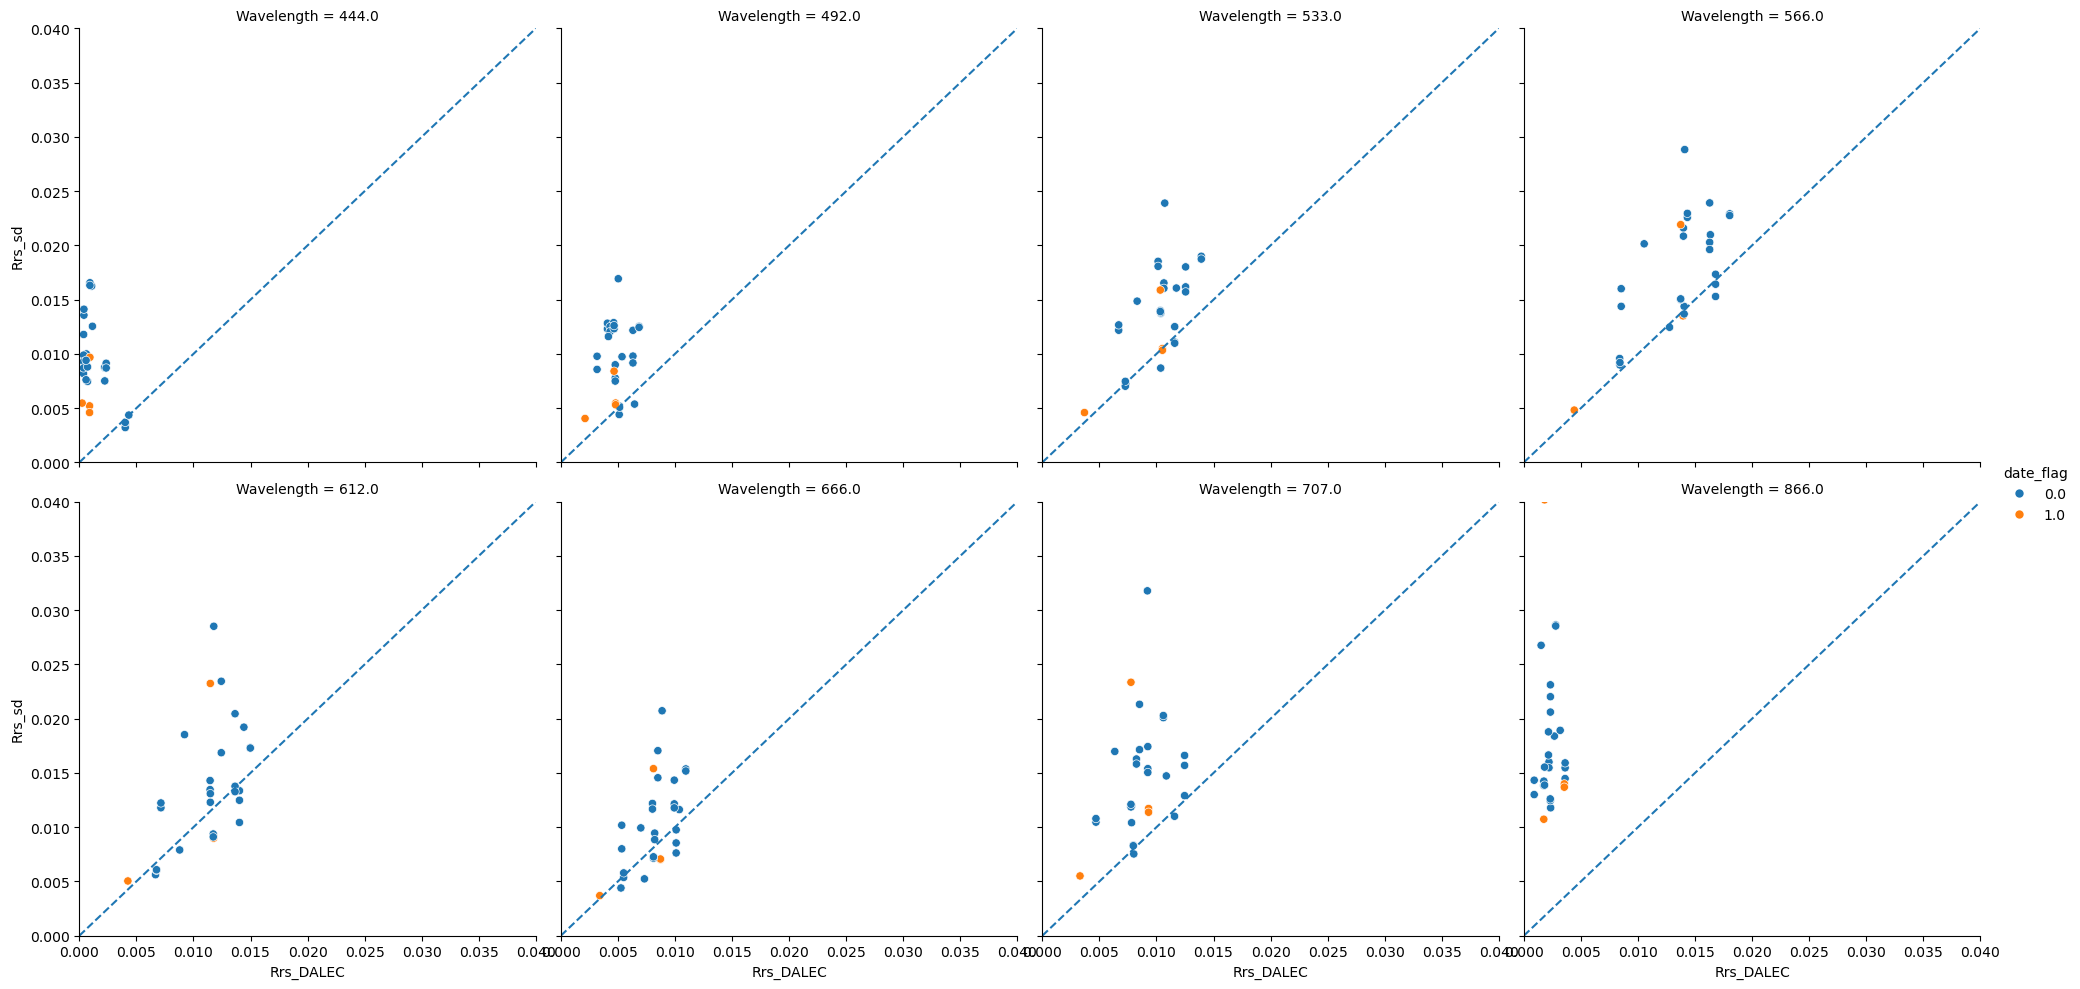

In [29]:
g = sns.relplot(data=dalec_morn_sd_alt, x='Rrs_DALEC', y='Rrs_sd', col='Wavelength', col_wrap=4, hue='date_flag')
g.set(ylim=(0, 0.04), xlim=(0, 0.04))

for ax in g.axes.flat:
    ax.plot([0, 0.04], [0, 0.04], '--')

### ^^ only using these hours really makes very little difference

# Try a chl-a alg

Going to use model C from https://www.sciencedirect.com/science/article/pii/S0034425719301786#s0010



In [30]:
def chla_gurlin2011(df, a=86.09, b=-517.5, c=886):
    ratio = df['Rrs_708'] / df['Rrs_666']
    return (a*(ratio**2)) + (b*ratio) + c

def chla_model_A(df, a=80.7, b=53.18):
    return a * (df['Rrs_708'] / df['Rrs_666']) + b

def chla_model_J(df, a=19.31, b=153.5, c=105.4):
    ratio = (df['Rrs_708'] - df['Rrs_666'])/(df['Rrs_708'] + df['Rrs_666'])
    return a + (b*ratio) + (c*(ratio**2))
 
sd_chla = pd.DataFrame(data={'Date':sds_med[sds_med.Wavelength==707.0].reset_index().Date,
                              'date':sds_med[sds_med.Wavelength==707.0].reset_index().date, 
                              'Rrs_708':sds_med[sds_med.Wavelength==707.0].reset_index().Rrs_sd,
                              'Rrs_666':sds_med[sds_med.Wavelength==666.0].reset_index().Rrs_sd  })

sd_chla['chl-a_gurlin'] = chla_gurlin2011(sd_chla)
sd_chla['chl-a_A'] = chla_model_A(sd_chla)
sd_chla['chl-a_J'] = chla_model_J(sd_chla)
sd_chla['chl-a_J_cal'] = chla_model_J(sd_chla, a=18.44, b=149.2, c=347.9)
sd_chla['chl-a_K_org'] = chla_model_J(sd_chla, a=14.039, b=86.115, c=194.33)

sd_chla

dalec_chla = pd.DataFrame(data={
                              'date':dalec_med[dalec_med.Wavelength==707.0].reset_index().date, 
                              'Rrs_708':dalec_med[dalec_med.Wavelength==707.0].reset_index().Rrs_DALEC,
                              'Rrs_666':dalec_med[dalec_med.Wavelength==666.0].reset_index().Rrs_DALEC  })

dalec_chla['chl-a_gurlin'] = chla_gurlin2011(dalec_chla)
dalec_chla['chl-a_A'] = chla_model_A(dalec_chla)
dalec_chla['chl-a_J'] = chla_model_J(dalec_chla)
dalec_chla['chl-a_J_cal'] = chla_model_J(dalec_chla, a=18.44, b=149.2, c=347.9)
dalec_chla['chl-a_K_org'] = chla_model_J(dalec_chla, a=14.039, b=86.115, c=194.33)


dalec_chla

,date,Rrs_708,Rrs_666,chl-a_gurlin,chl-a_A,chl-a_J,chl-a_J_cal,chl-a_K_org
0,2022-07-28,0.006881,0.005111,345.352535,161.820021,44.256417,48.032450,30.978225
1,2022-07-31,0.008219,0.005539,307.642067,172.932686,53.215789,60.712332,38.192086
2,2022-08-01,0.007481,0.005256,323.850173,168.037859,49.337332,55.114736,35.009457
3,2022-08-02,0.007381,0.004886,300.679656,175.096293,54.896474,63.186385,39.597900
4,2022-08-03,0.006902,0.004405,286.552367,179.610246,58.337357,68.338391,42.523879
...,...,...,...,...,...,...,...,...
91,2023-09-26,0.005212,0.004990,439.400365,137.469566,22.699486,21.850718,16.004530
92,2023-09-27,0.004661,0.004372,432.093617,139.225599,24.339290,23.580666,16.999431
93,2023-09-28,0.003415,0.003499,462.897557,131.950061,17.467749,16.685306,13.025281
94,2023-09-29,0.002448,0.002607,476.079244,128.933628,14.562360,14.070697,11.510666


<Axes: xlabel='Date', ylabel='chl-a_J'>

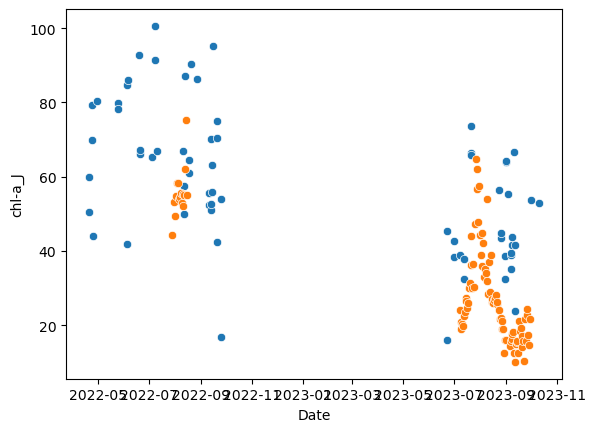

In [31]:
sns.scatterplot(data=sd_chla, x='Date', y='chl-a_J')
sns.scatterplot(data=dalec_chla, x='date', y='chl-a_J')


<Axes: xlabel='Date', ylabel='chl-a_J'>

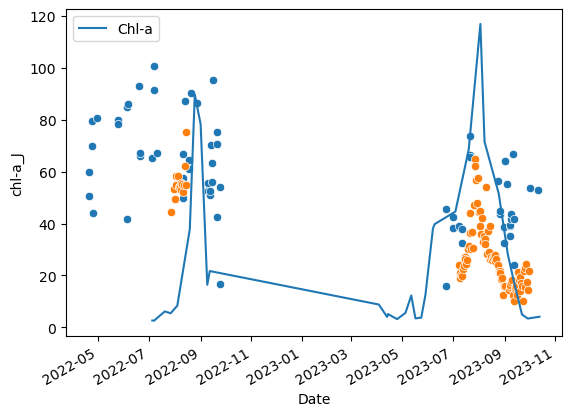

In [32]:
insitu_chl = pd.read_csv('data/chl-a/airthrey_chl.csv')
insitu_chl.Date = pd.to_datetime(insitu_chl.Date, dayfirst=True)
insitu_chl.plot(x='Date', y='Chl-a')
sns.scatterplot(data=sd_chla, x='Date', y='chl-a_J')
sns.scatterplot(data=dalec_chla, x='date', y='chl-a_J')

In [33]:
# not my finest work, but does the job
# by the way, the job being that we are finding the closest in-situ measurements to the superdoves data! 

selected_dates = []
date_diffs = []
selected_chl = []
for sd_date in sd_chla.date:
    date_deltas = []
    for ins_date in insitu_chl.Date:
        #print(ins_date)
        date_deltas.append(sd_date - ins_date)
    date_deltas = np.array(np.abs(date_deltas))
    min_ind = np.where(date_deltas==date_deltas.min())
    #print(min_ind)
    selected_dates.append(insitu_chl.Date[min_ind[0][0]])
    date_diffs.append(date_deltas[min_ind[0][0]])
    selected_chl.append(insitu_chl['Chl-a'][min_ind[0][0]])
    
selected_dates
sd_chla['insitu_chla'] =  selected_chl
sd_chla['insitu_date'] = selected_dates
sd_chla['insitu_date_diff'] = date_diffs

In [34]:
# do the same for the dalec
selected_dates = []
date_diffs = []
selected_chl = []
for sd_date in dalec_chla.date:
    date_deltas = []
    for ins_date in insitu_chl.Date:
        #print(ins_date)
        date_deltas.append(sd_date - ins_date)
    date_deltas = np.array(np.abs(date_deltas))
    min_ind = np.where(date_deltas==date_deltas.min())
    #print(min_ind)
    selected_dates.append(insitu_chl.Date[min_ind[0][0]])
    date_diffs.append(date_deltas[min_ind[0][0]])
    selected_chl.append(insitu_chl['Chl-a'][min_ind[0][0]])
    
selected_dates
dalec_chla['insitu_chla'] =  selected_chl
dalec_chla['insitu_date'] = selected_dates
dalec_chla['insitu_date_diff'] = date_diffs

In [47]:
def clean_chla_dates(row):
    if row['insitu_date_diff'] <= timedelta(1):
        return row['insitu_chla']
    else:
        return np.nan

sd_chla['insitu_chl_clean'] = sd_chla.apply(clean_chla_dates, axis=1)
dalec_chla['insitu_chl_clean'] = dalec_chla.apply(clean_chla_dates, axis=1)

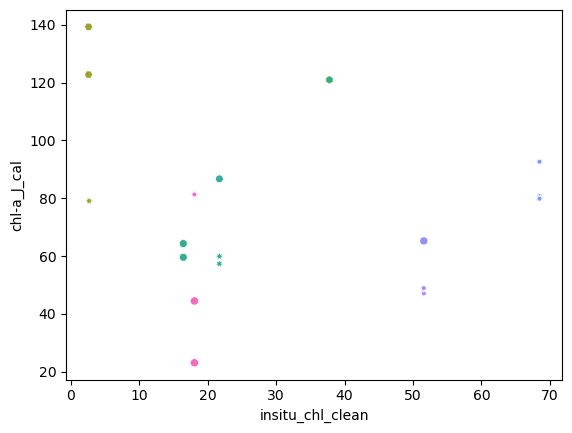

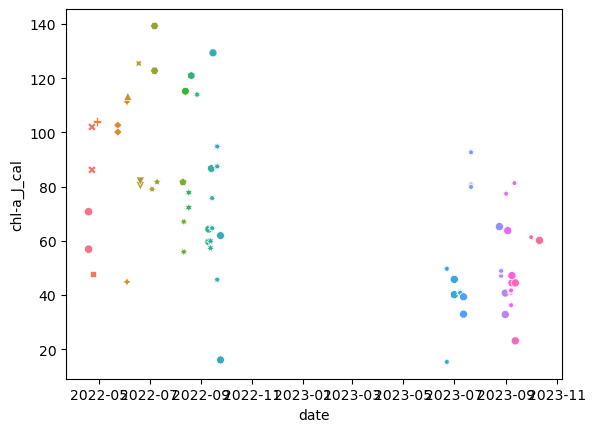

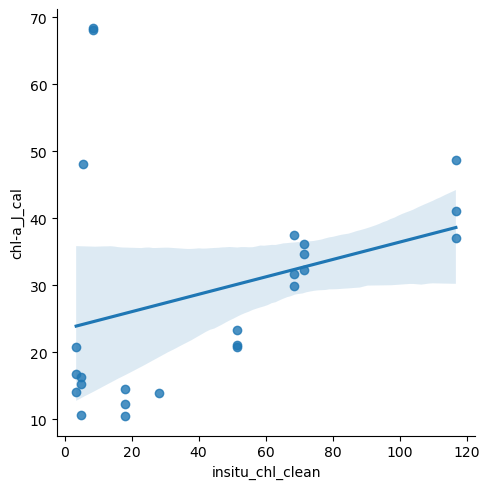

In [60]:
g = sns.scatterplot(data=sd_chla, y='chl-a_J_cal', x='insitu_chl_clean',
                    hue='date', style='date', legend=False)
plt.show()

sns.scatterplot(data=sd_chla, y='chl-a_J_cal', x='date',
                    hue='date', style='date', legend=False)

def annotate(data, **kws):
    res = sp.stats.linregress(data.dropna()['insitu_chl_clean'], data.dropna()['chl-a_J_cal'])
    ax = plt.gca()
    ax.text(0.05, 0.9, 'r={:.2f}, p={:.2g}'.format(res.rvalue, res.pvalue),
            transform=ax.transAxes)
    ax.plot([0.0001, 0.05],
            [res.intercept + res.slope*0.0001, res.intercept + res.slope*0.05])

    
#g.map_dataframe(annotate)

g = sns.lmplot(data=dalec_chla, y='chl-a_J_cal', x='insitu_chl_clean', )#hue='insitu_date_diff')
#g.map_dataframe(annotate)


## so, is the chl-a algorithm working?

- I've been trying algorithms based on the NIR band ratio with bands 707, 666
- the results I get with dalec data show some promise:
    - there is a clear positive correlation, suggesting that with proper tuning we could probably get this algorithm to give good results.
- but, the planet data doesn't seem to work for this
    - no obvious correlation

## Options

- explore alternative algorithms:
    - if I assume my match up validation with DALEC data is good then I would need to find algorithms which only use the bands which fit well
    - I think the NIR ratio 707/666 isn't good with the planet data
    - Claire Neil's paper https://www.sciencedirect.com/science/article/pii/S0034425719301786#s0010 doesn't seem to look at any other algorithms which would work well with the bands which appear to be good.
    
- OR maybe the issue is that I need to exclude some planet images. 
    - think this should be the first port of call! - it might reduce the number of data points, but hopefully will massively improve my life.

### How to exclude / flag potentially bad images

- planet has udm2 data which provides masks for snow, shadow, light haze, heavy haze, cloud 
- these files are the `....udm2_clip.tif` files in the PSScene folders
- now, on inspection, it seems that these aren't perfect. 
    - they seem to catch large clouds and shadows, but miss smaller features which I can recognise by eye in the RGB images
    - so far, I haven't found any cases where the udm2 mask identifies features that I can't see by eye.
    - therefore, probably best to rely largely on visual inspection!
- but, for a paper it might be good to have done the cleaning of images using both udm2 and visual inspection (this just sounds more pro, and does provide a double check in some ways)


In [ ]:
Rrs_708_666 = sds_med[sds_med.Wavelength==707.0].Rrs_sd.values / sds_med[sds_med.Wavelength==666.0].Rrs_sd.values

In [ ]:
ratio_df = pd.DataFrame(data={'Date':sds_med[sds_med.Wavelength==707.0].Date,
                              'date':sds_med[sds_med.Wavelength==707.0].date, 
                              'Rrs_708_666':Rrs_708_666})
ratio_df

In [ ]:
sd_chla

<Axes: xlabel='date', ylabel='chl-a_J_cal'>

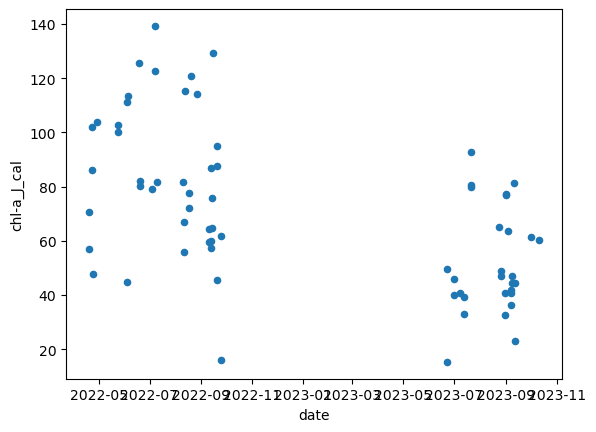

In [56]:
sd_chla.plot(x='date', y='chl-a_J_cal', kind='scatter')